# Análise Experimento 2

In [54]:
import pandas as pd

caminho_csv = './resultados_experimento2.csv'

df = pd.read_csv(caminho_csv)

df.head()

,pop_size,geracoes,elite_rate,mutation_rate,melhor_solucao,melhor_custo,tempo_execucao_s,geracao_melhor_custo,configuracao,elitism,selection,crossover,mutation
0,100,100,0.2,0.1,[0 9 6 5 8 7 4 1 2 3],4112.0,1.634579,32,"{'selection': 'tournament', 'crossover': 'cx',...",simple,tournament,cx,swap
1,100,100,0.2,0.1,[0 9 6 5 8 7 4 1 2 3],4112.0,1.818518,24,"{'selection': 'tournament', 'crossover': 'mpx'...",simple,tournament,mpx,swap
2,100,100,0.2,0.1,[9 4 6 1 3 8 0 2 5 7],5461.0,1.559439,23,"{'selection': 'tournament', 'crossover': 'cx',...",simple,tournament,cx,swap
3,100,100,0.2,0.1,[9 3 2 8 4 1 7 6 5 0],5476.0,1.710993,24,"{'selection': 'tournament', 'crossover': 'mpx'...",simple,tournament,mpx,swap
4,100,100,0.2,0.1,[2 5 6 9 0 8 7 3 1 4],6084.0,1.559347,31,"{'selection': 'tournament', 'crossover': 'cx',...",simple,tournament,cx,swap


In [62]:
import ast

# Converte a string da coluna 'configuracao' para dicionário e expande em colunas
config_df = df['configuracao'].apply(lambda x: ast.literal_eval(x)).apply(pd.Series)

# Renomeia as colunas, se necessário
config_df.rename(columns={'selection': 'selection_type', 'crossover': 'crossover_type', 'mutation': 'mutation_type'}, inplace=True)

# Concatena o DataFrame original com as novas colunas
df_expanded = pd.concat([df.drop(columns=['configuracao']), config_df], axis=1)
df_expanded.head()  

,pop_size,geracoes,elite_rate,mutation_rate,melhor_solucao,melhor_custo,tempo_execucao_s,geracao_melhor_custo,elitism,selection,crossover,mutation,selection_type,crossover_type,elitism,mutation_type
0,100,100,0.2,0.1,[0 9 6 5 8 7 4 1 2 3],4112.0,1.634579,32,simple,tournament,cx,swap,tournament,cx,simple,swap
1,100,100,0.2,0.1,[0 9 6 5 8 7 4 1 2 3],4112.0,1.818518,24,simple,tournament,mpx,swap,tournament,mpx,simple,swap
2,100,100,0.2,0.1,[9 4 6 1 3 8 0 2 5 7],5461.0,1.559439,23,simple,tournament,cx,swap,tournament,cx,simple,swap
3,100,100,0.2,0.1,[9 3 2 8 4 1 7 6 5 0],5476.0,1.710993,24,simple,tournament,mpx,swap,tournament,mpx,simple,swap
4,100,100,0.2,0.1,[2 5 6 9 0 8 7 3 1 4],6084.0,1.559347,31,simple,tournament,cx,swap,tournament,cx,simple,swap


In [56]:
fitness_means = df_expanded.groupby('crossover')['melhor_custo'].mean().reset_index(name='mean_fitness')
fitness_stds = df_expanded.groupby('crossover')['melhor_custo'].std().reset_index(name='std_fitness')
time_means = df_expanded.groupby('crossover')['tempo_execucao_s'].mean().reset_index(name='mean_execution_time')
geracao_means = df_expanded.groupby('crossover')['geracao_melhor_custo'].mean().reset_index(name='mean_generation_best_cost')

# Juntando tudo em um único DataFrame
analysis_summary = fitness_means.merge(fitness_stds, on='crossover') \
                                .merge(time_means, on='crossover') \
                                .merge(geracao_means, on='crossover')

analysis_summary


,crossover,mean_fitness,std_fitness,mean_execution_time,mean_generation_best_cost
0,cx,5702.90,739.229820,1.532676,20.0
1,mpx,5717.75,770.078525,1.760499,27.1


## Análise do Custo Médio

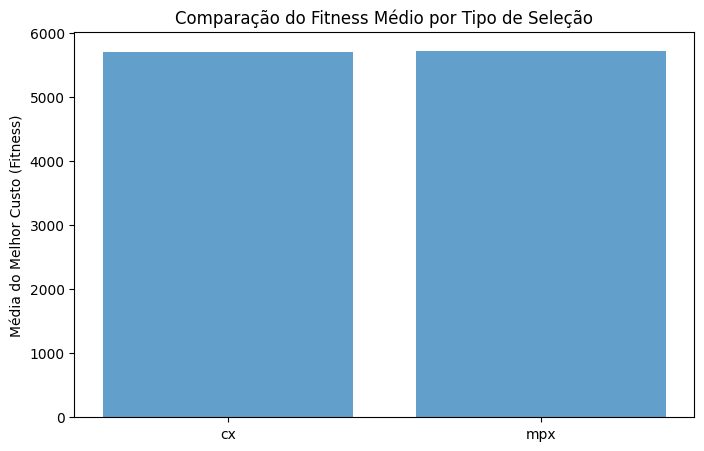

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(analysis_summary['crossover'], analysis_summary['mean_fitness'], alpha=0.7)
plt.ylabel('Média do Melhor Custo (Fitness)')
plt.title('Comparação do Fitness Médio por Tipo de Seleção')
plt.show()



## Análise de Tempo Médio de Execução

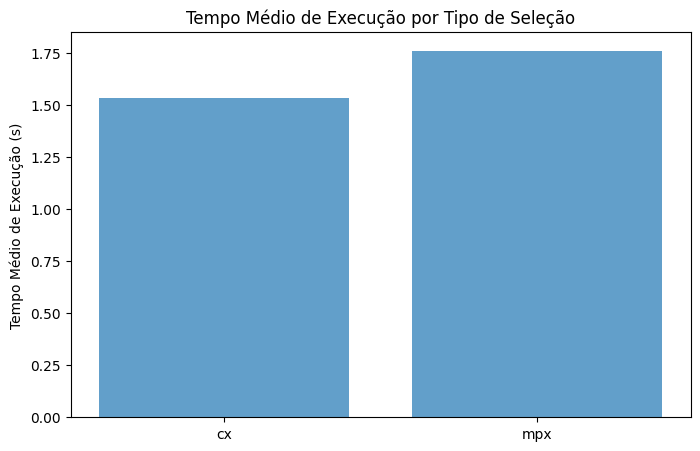

In [58]:
plt.figure(figsize=(8, 5))
plt.bar(analysis_summary['crossover'], analysis_summary['mean_execution_time'], alpha=0.7)
plt.ylabel('Tempo Médio de Execução (s)')
plt.title('Tempo Médio de Execução por Tipo de Seleção')
plt.show()


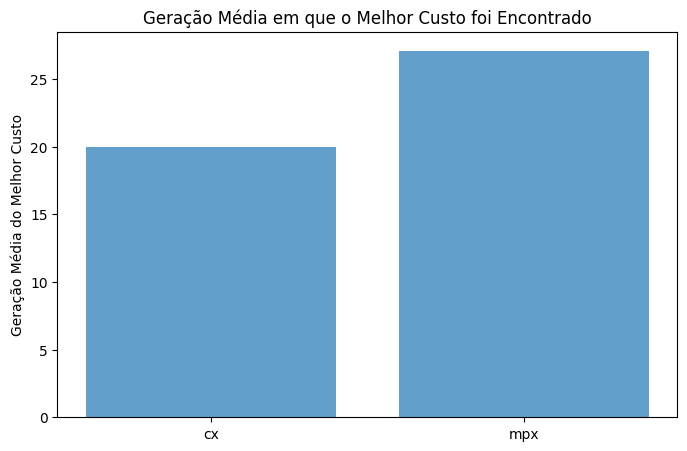

In [59]:
plt.figure(figsize=(8, 5))
plt.bar(analysis_summary['crossover'], analysis_summary['mean_generation_best_cost'], alpha=0.7)
plt.ylabel('Geração Média do Melhor Custo')
plt.title('Geração Média em que o Melhor Custo foi Encontrado')
plt.show()


In [60]:
import pandas as pd

# Criar um DataFrame para armazenar os resultados da comparação, considerando empates corretamente
comparisons = []

for i in range(0, len(df), 2):
    row1 = df.iloc[i]
    row2 = df.iloc[i + 1]

    #  Comparação do melhor custo (fitness)
    if row1['melhor_custo'] < row2['melhor_custo']:
        melhor_custo_vencedor = row1['crossover']
    elif row1['melhor_custo'] > row2['melhor_custo']:
        melhor_custo_vencedor = row2['crossover']
    else:
        melhor_custo_vencedor = 'empate'

    #  Comparação do tempo (geração do melhor custo)
    if row1['geracao_melhor_custo'] < row2['geracao_melhor_custo']:
        geracao_vencedor = row1['crossover']
    elif row1['geracao_melhor_custo'] > row2['geracao_melhor_custo']:
        geracao_vencedor = row2['crossover']
    else:
        geracao_vencedor = 'empate'

    comparisons.append({
        'par': i // 2 + 1,
        'melhor_custo_vencedor': melhor_custo_vencedor,
        'geracao_vencedor': geracao_vencedor
    })

# Transformar os resultados em DataFrame
comparison_df = pd.DataFrame(comparisons)

# Contagem de vitórias e empates em cada categoria
melhor_custo_counts = comparison_df['melhor_custo_vencedor'].value_counts().reset_index()
melhor_custo_counts.columns = ['resultado', 'vezes_melhor_custo']

geracao_counts = comparison_df['geracao_vencedor'].value_counts().reset_index()
geracao_counts.columns = ['resultado', 'vezes_mais_rapido']

#  Unir os resultados em uma tabela final
final_comparison = pd.merge(melhor_custo_counts, geracao_counts, on='resultado', how='outer').fillna(0)

final_comparison

,resultado,vezes_melhor_custo,vezes_mais_rapido
0,cx,10,14.0
1,empate,3,0.0
2,mpx,7,6.0


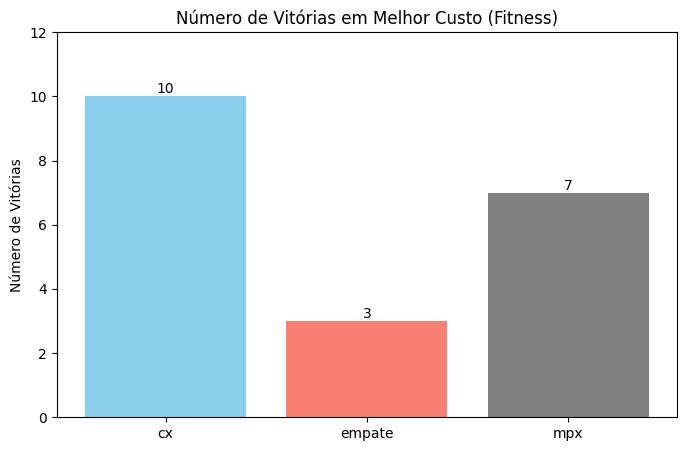

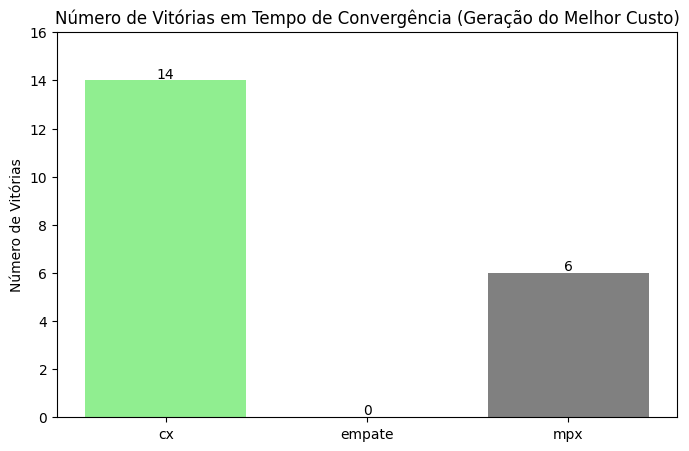

In [61]:
# Gráfico de barras: Número de vitórias em Melhor Custo
plt.figure(figsize=(8, 5))
plt.bar(final_comparison['resultado'], final_comparison['vezes_melhor_custo'], color=['skyblue', 'salmon', 'gray'])
plt.ylabel('Número de Vitórias')
plt.title('Número de Vitórias em Melhor Custo (Fitness)')
plt.ylim(0, final_comparison[['vezes_melhor_custo']].values.max() + 2)
for index, value in enumerate(final_comparison['vezes_melhor_custo']):
    plt.text(index, value + 0.1, str(int(value)), ha='center')
plt.show()

#  Gráfico de barras: Número de vitórias em Tempo de Convergência
plt.figure(figsize=(8, 5))
plt.bar(final_comparison['resultado'], final_comparison['vezes_mais_rapido'], color=['lightgreen', 'orange', 'gray'])
plt.ylabel('Número de Vitórias')
plt.title('Número de Vitórias em Tempo de Convergência (Geração do Melhor Custo)')
plt.ylim(0, final_comparison[['vezes_mais_rapido']].values.max() + 2)
for index, value in enumerate(final_comparison['vezes_mais_rapido']):
    plt.text(index, value + 0.1, str(int(value)), ha='center')
plt.show()

plt.show()
